In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

### Windowed Q

In [43]:
s = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


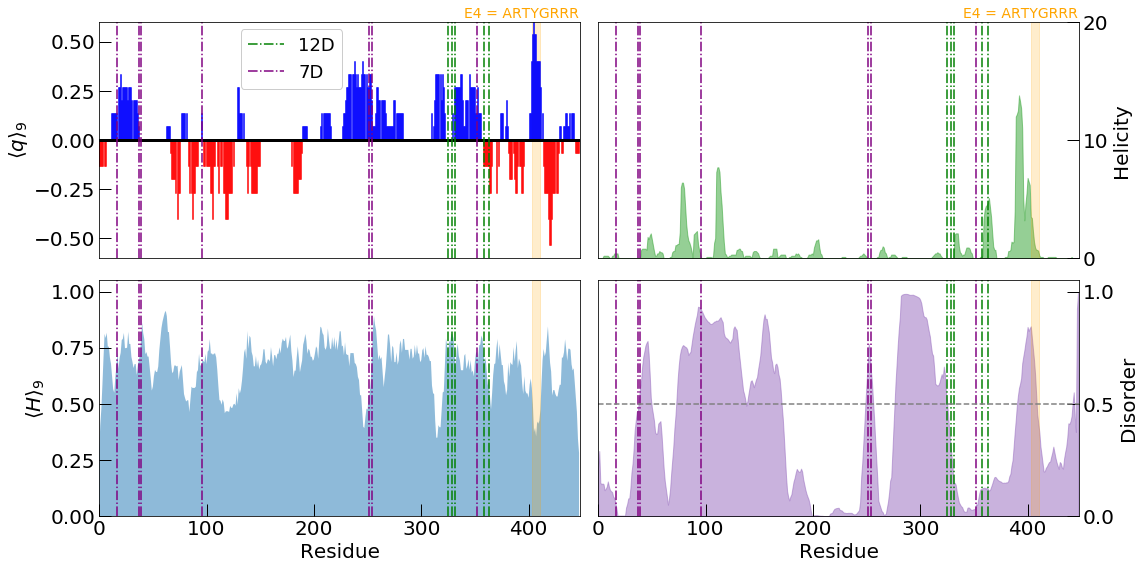

In [139]:
fig, axs = plt.subplots(2,2, figsize=(16,8))

fig.subplots_adjust(wspace=0, hspace=0)
win, plus, minus = s.get_charge_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

for i,p in enumerate(plus):
    if p!=0.:
        axs[0][0].axvline(i,0.5,p+0.5, color='blue')
for i,p in enumerate(minus):
    if p!=0.:
        axs[0][0].axvline(i,0.5,p+0.5, color='red')
axs[0][0].axhline(0, color='black', lw=3)
axs[0][0].axvspan(403,411, alpha=0.2, color='orange')
axs[0][0].set_xlim(0,448)
axs[0][0].set_ylim(-0.6, 0.6)
axs[0][0].set_xlabel("")
axs[0][0].set_ylabel("$\langle q⟩_9$")
axs[0][0].set_xticks([])
axs[0][0].text(340, 0.62, 'E4 = ARTYGRRR', fontsize=14, color='orange')

axs[0][0].legend([Line2D([0], [0], color='green', ls='dashdot'), Line2D([0], [0], color='purple', ls='dashdot')],
           ['12D', '7D'], loc='lower center', bbox_to_anchor=(0.4,0.68))

t = lmpsetup.LMPSetup(protein='CPEB4', oliba_wd=None)
win, plus, minus = t.get_lambda_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

axs[1][0].fill_between(np.arange(448), plus, 0, alpha=0.5)
# for i,p in enumerate(plus):
#     if p!=0.:
#         axs[1][0].axvline(i,0,p, color='blue', alpha=0.5)

# axs[1][0].axhline(0, color='black', lw=3)
axs[1][0].axvspan(403,411, alpha=0.2, color='orange')
axs[1][0].set_xlim(0,448)
axs[1][0].set_ylim(0,1.05)
axs[1][0].set_xlabel("")
axs[1][0].set_ylabel("$\langle H⟩_9$")
axs[1][0].set_xlabel("Residue")

used = []
for i in range(len(wt_seq)):
    if wt_seq[i] != d7_seq[i]:
        axs[1][0].axvline(i, color='purple', lw=1.5, ls='dashdot')
        axs[0][0].axvline(i, color='purple', lw=1.5, ls='dashdot')
        axs[0][1].axvline(i, color='purple', lw=1.5, ls='dashdot')
        axs[1][1].axvline(i, color='purple', lw=1.5, ls='dashdot')
        used.append(i)

for i in range(len(d4_seq)):
    if d4_seq[i] != d12_seq[i] and i not in used:
        axs[1][0].axvline(i, color='green', lw=1.5, ls='dashdot')
        axs[0][0].axvline(i, color='green', lw=1.5, ls='dashdot')
        axs[0][1].axvline(i, color='green', lw=1.5, ls='dashdot')
        axs[1][1].axvline(i, color='green', lw=1.5, ls='dashdot')

helicity = np.genfromtxt('/home/adria/documents/CPEB4-NTD_agadir.txt', skip_header=13, delimiter=',')
axs[0][1].fill_between(np.arange(448), helicity[:,2], 0, color='tab:green', alpha=0.5)
axs[0][1].set_xticks([])
axs[0][1].set_ylabel("Helicity")
axs[0][1].set_xlim(0,448)
axs[0][1].yaxis.set_label_position("right")
axs[0][1].yaxis.set_ticks_position("right")
axs[0][1].axvspan(403,411, alpha=0.2, color='orange')
axs[0][1].set_yticks([0,10,20])
axs[0][1].set_ylim(0,20)
axs[0][1].text(340, 20.35, 'E4 = ARTYGRRR', fontsize=14, color='orange')

disorder = np.genfromtxt('/home/adria/documents/CPEB4_disorder.txt')
axs[1][1].fill_between(np.arange(448), disorder[:,1], 0, color='tab:purple', alpha=0.5)
axs[1][1].set_ylabel("Disorder")
axs[1][1].set_yticks([0,0.5,1])
axs[1][1].axvspan(403,411, alpha=0.2, color='orange')
axs[1][1].set_xlabel("Residue")
axs[1][1].set_xlim(0,448)
axs[1][1].yaxis.set_label_position("right")
axs[1][1].yaxis.set_ticks_position("right")
axs[1][1].set_ylim(0,1.05)
axs[1][1].axhline(0.5, ls='--', color='grey')

fig.tight_layout()

In [176]:
s = lmp.LMP(md_dir='/home/adria/data/real_final/HPS-T/1.0/WT')

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every 10 for a total of [10001, 10001, 10001, 10001, 10001, 10001, 10001, 10001] to avoid strong correlations


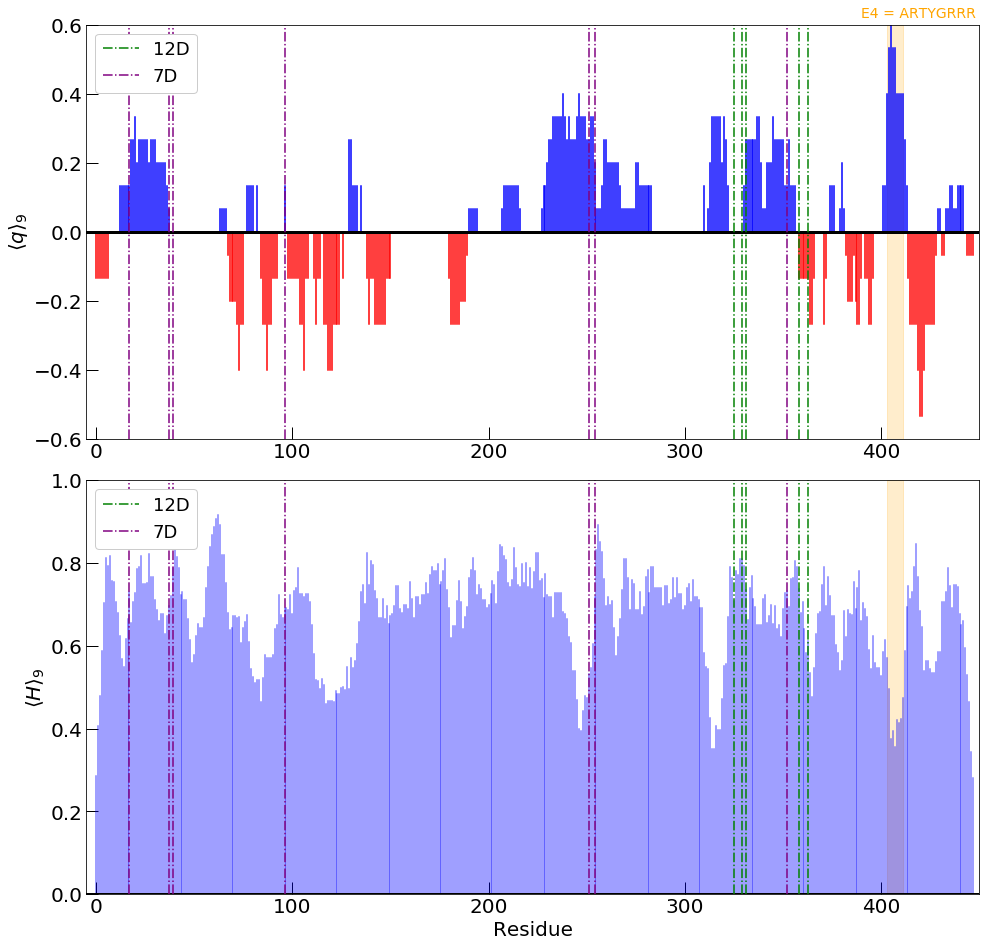

In [179]:
fig, axs = plt.subplots(2,1, figsize=(16,16))
fig.subplots_adjust(hspace=0.1)
win, plus, minus = s.get_charge_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

for i,p in enumerate(plus):
    if p!=0.:
        axs[0].axvline(i,0.5,p+0.5, color='blue')
for i,p in enumerate(minus):
    if p!=0.:
        axs[0].axvline(i,0.5,p+0.5, color='red')
axs[0].axhline(0, color='black', lw=3)
axs[0].axvspan(403,411, alpha=0.2, color='orange')
axs[0].set_xlim(-5,450)
axs[0].set_ylim(-0.6, 0.6)
axs[0].set_xlabel("")
axs[0].set_ylabel("$\langle q⟩_9$")
# axs[0].set_xlabel("Residue")
axs[0].text(390, 0.62, 'E4 = ARTYGRRR', fontsize=14, color='orange')

used = []
for i in range(len(wt_seq)):
    if wt_seq[i] != d7_seq[i]:
        axs[0].axvline(i, color='purple', lw=1.5, ls='dashdot')
        used.append(i)

for i in range(len(d4_seq)):
    if d4_seq[i] != d12_seq[i] and i not in used:
        axs[0].axvline(i, color='green', lw=1.5, ls='dashdot')

axs[0].legend([Line2D([0], [0], color='green', ls='dashdot'), Line2D([0], [0], color='purple', ls='dashdot')],
           ['12D', '7D'], loc='upper left')


t = lmpsetup.LMPSetup(protein='CPEB4', oliba_wd=None)
win, plus, minus = t.get_lambda_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

for i,p in enumerate(plus):
    if p!=0.:
        plt.axvline(i,0,p, color='blue', alpha=0.5)
# for i,p in enumerate(minus):
#     if p!=0.:
#         plt.axvline(i,0.5,p+0.5, color='red')
axs[1].axhline(0, color='black', lw=3)
axs[1].axvspan(403,411, alpha=0.2, color='orange')
axs[1].set_xlim(-5,450)
# plt.ylim(-0.6, 0.6)
axs[1].set_xlabel("")
axs[1].set_ylabel("$\langle H⟩_9$")
axs[1].set_xlabel("Residue")
# axs[1].text(390, 1.02, 'E4 = ARTYGRRR', fontsize=14, color='orange')

used = []
for i in range(len(wt_seq)):
    if wt_seq[i] != d7_seq[i]:
        axs[1].axvline(i, color='purple', lw=1.5, ls='dashdot')
        used.append(i)

for i in range(len(d4_seq)):
    if d4_seq[i] != d12_seq[i] and i not in used:
        axs[1].axvline(i, color='green', lw=1.5, ls='dashdot')

axs[1].legend([Line2D([0], [0], color='green', ls='dashdot'), Line2D([0], [0], color='purple', ls='dashdot')],
           ['12D', '7D'], loc='upper left')

# fig.tight_layout()

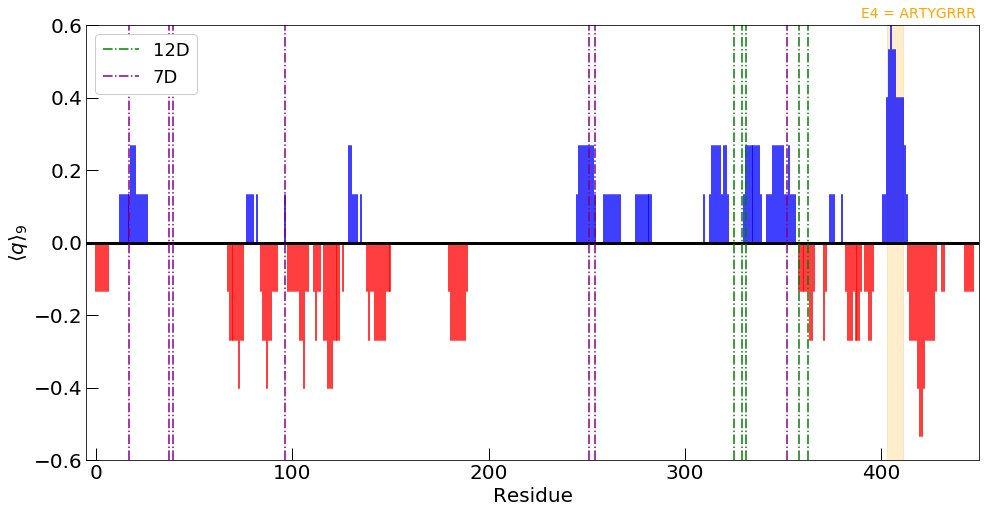

In [28]:
win, plus, minus =s.get_charge_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

plt.figure(figsize=(16,8))

for i,p in enumerate(plus):
    if p!=0.:
        plt.axvline(i,0.5,p+0.5, color='blue')
for i,p in enumerate(minus):
    if p!=0.:
        plt.axvline(i,0.5,p+0.5, color='red')
plt.axhline(0, color='black', lw=3)
plt.axvspan(403,411, alpha=0.2, color='orange')
plt.xlim(-5,450)
plt.ylim(-0.6, 0.6)
plt.xlabel("")
plt.ylabel("$\langle q⟩_9$")
plt.xlabel("Residue")
plt.text(390, 0.62, 'E4 = ARTYGRRR', fontsize=14, color='orange')

used = []
for i in range(len(wt_seq)):
    if wt_seq[i] != d7_seq[i]:
        plt.axvline(i, color='purple', lw=1.5, ls='dashdot')
        used.append(i)

for i in range(len(d4_seq)):
    if d4_seq[i] != d12_seq[i] and i not in used:
        plt.axvline(i, color='green', lw=1.5, ls='dashdot')

plt.legend([Line2D([0], [0], color='green', ls='dashdot'), Line2D([0], [0], color='purple', ls='dashdot')],
           ['12D', '7D'], loc='upper left')

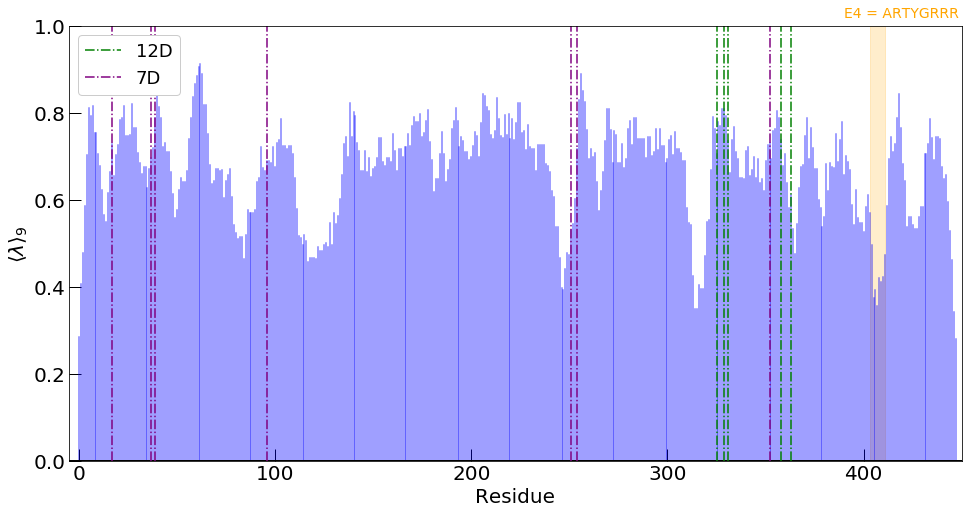

In [162]:
t = lmpsetup.LMPSetup(protein='CPEB4', oliba_wd=None)
win, plus, minus = t.get_lambda_seq()

with open('/home/adria/scripts/data/sequences/CPEB4.seq') as wt:
    wt_seq = wt.readlines()[0]
with open('/home/adria/scripts/data/sequences/CPEB4_D4.seq') as d4:
    d4_seq = d4.readlines()[0]
with open('/home/adria/scripts/data/sequences/12D_CPEB4_D4.seq') as d12:
    d12_seq = d12.readlines()[0]
with open('/home/adria/scripts/data/sequences/7D_CPEB4.seq') as d7:
    d7_seq = d7.readlines()[0]

plt.figure(figsize=(16,8))

for i,p in enumerate(plus):
    if p!=0.:
        plt.axvline(i,0,p, color='blue', alpha=0.5)
# for i,p in enumerate(minus):
#     if p!=0.:
#         plt.axvline(i,0.5,p+0.5, color='red')
plt.axhline(0, color='black', lw=3)
plt.axvspan(403,411, alpha=0.2, color='orange')
plt.xlim(-5,450)
# plt.ylim(-0.6, 0.6)
plt.xlabel("")
plt.ylabel("$\langle \lambda⟩_9$")
plt.xlabel("Residue")
plt.text(390, 1.02, 'E4 = ARTYGRRR', fontsize=14, color='orange')

used = []
for i in range(len(wt_seq)):
    if wt_seq[i] != d7_seq[i]:
        plt.axvline(i, color='purple', lw=1.5, ls='dashdot')
        used.append(i)

for i in range(len(d4_seq)):
    if d4_seq[i] != d12_seq[i] and i not in used:
        plt.axvline(i, color='green', lw=1.5, ls='dashdot')

plt.legend([Line2D([0], [0], color='green', ls='dashdot'), Line2D([0], [0], color='purple', ls='dashdot')],
           ['12D', '7D'], loc='upper left')

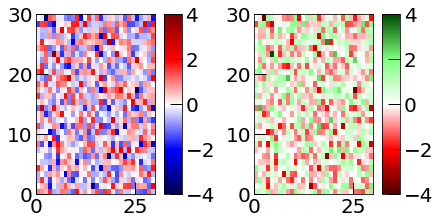

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
np.set_printoptions(threshold=sys.maxsize)

seismic = cm.get_cmap('seismic', 256)

viridis = cm.get_cmap('viridis', 256)
ds = viridis(np.linspace(0, 1, 256))

ds[:]=0
ds[:,3] = 1
ds[:64,1]=np.linspace(0.3,1,64)
ds[:64,0]=np.linspace(0,0.5,64)
ds[:64,2]=np.linspace(0,0.5,64)
ds[64:128,1]=1
ds[64:128,0]=np.linspace(0.5,1,64)
ds[64:128,2]=np.linspace(0.5,1,64)

ds[128:192,0]=1
ds[128:192,1]=np.linspace(1,0,64)
ds[128:192,2]=np.linspace(1,0,64)
ds[192:256,0]=np.linspace(1,0.3,64)

ds = np.flip(ds,axis=0)
newcmp = ListedColormap(ds)

def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()

plot_examples([seismic, newcmp])

### KH vs HPS

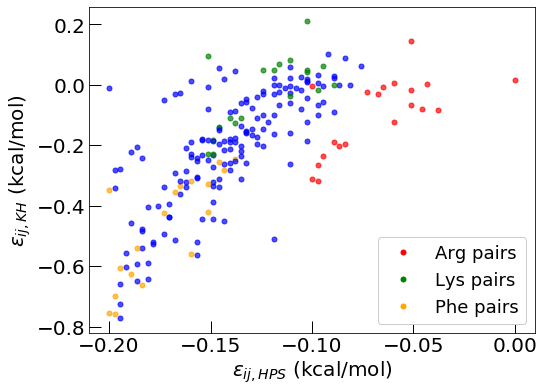

In [28]:
aromatic = ["ARG"]
charged = ["LYS"]
other = ["PHE"]

plt.figure(figsize=(8,6))
s = lmp.LMP(md_dir=None)
hps = s.pair_energies()
kh = s.pair_energies(model='KH')
aas = list(s.residue_dict.keys())
for i in range(len(aas)):
    for j in range(i,len(aas)):    
        color='blue'
        if s.residue_dict[aas[i]]["name"] in aromatic or s.residue_dict[aas[j]]["name"] in aromatic:
            color='red'
        elif s.residue_dict[aas[i]]["name"] in charged or s.residue_dict[aas[j]]["name"] in charged:
            color='green'
        elif s.residue_dict[aas[i]]["name"] in other or s.residue_dict[aas[j]]["name"] in other:
            color='orange'
        plt.plot(hps[aas[i]][aas[j]], kh[aas[i]][aas[j]],  marker='o', markersize=5, color=color, alpha=0.7)
plt.xlabel("$ε_{ij,HPS}$ (kcal/mol)")
plt.ylabel("$ε_{ij,KH}$ (kcal/mol)")

plt.legend([Line2D([0], [0], markersize=5, marker='o', color='red', linestyle=''), 
            Line2D([0], [0], markersize=5, marker='o', color='green', linestyle=''), 
            Line2D([0], [0], markersize=5, marker='o', color='orange', linestyle='')],["Arg pairs", "Lys pairs", "Phe pairs"], loc='lower right')

In [359]:
s = np.ones(shape=(200))
s[::None].shape

(200,)

### FH

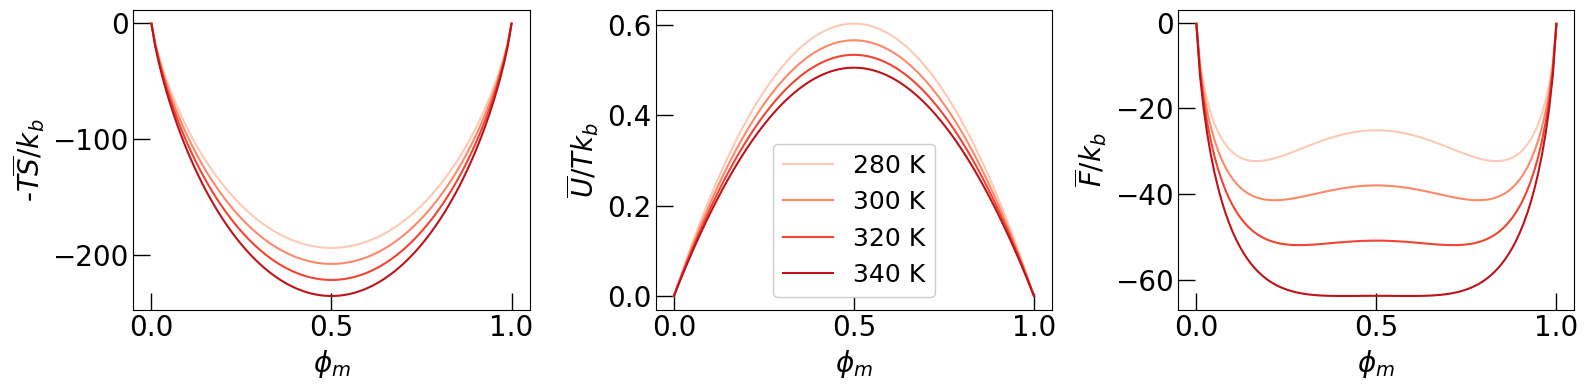

In [269]:
def S_FH(phi, n_a, n_b):
    S=(1-phi)*np.log(1-phi)/n_b+phi*np.log(phi)/n_a
    return -S

def U_FH(phi, a, b, T):
    chi = a + b/T
    return chi*phi*(1-phi)

n_a = 1
n_b = 1
phi = np.linspace(0.0001,0.9999,100)

A = 0.2
B = 620

fig, axs, = plt.subplots(1,3, figsize=(16,4))

cmap = plt.get_cmap('Reds')
cols = [0.2,0.4,0.6,0.8]

for i,T in enumerate([280,300,320, 340]):
    U = U_FH(phi, A, B, T)
    S = S_FH(phi, n_a, n_b)
    axs[1].plot(phi, U, label=f"{T:.0f} K", color=cmap(cols[i]))
    axs[0].plot(phi, -T*S, label=f"{T:.0f} K", color=cmap(cols[i]))
    axs[2].plot(phi, T*(U-S), label=f"{T:.0f} K", color=cmap(cols[i]))
    
axs[0].set_xlabel("$\phi_m$")
axs[1].set_xlabel("$\phi_m$")
axs[2].set_xlabel("$\phi_m$")

axs[0].set_ylabel("-$T\overline{S}/k_b$")
axs[1].set_ylabel("$\overline{U}/Tk_b$")
axs[2].set_ylabel("$\overline{F}/k_b$")

axs[1].legend(loc='lower center')
# axs[2].legend()

plt.tight_layout()

### Lambda MAP

In [288]:
aas = ["ARG", "HIS", "LYS", "ASP", "GLU", "SER", "THR", "ASN", "GLN", "CYS", "GLY", "PRO", "ALA", "VAL", "ILE", "LEU", "MET", "PHE", "TYR", "TRP"]
# aas2 = ["PHE","PRO","ILE","LEU","TRP","VAL","TYR","MET","ALA","THR","GLY","CYS","SER","GLN","HIS","LYS","GLU","ASN","ASP","ARG",]
greenc = ["ALA", "VAL", "ILE", "LEU", "MET", "PHE", "TYR", "TRP"]
orangec = ["CYS", "GLY", "PRO"]
bluec = ["SER", "THR", "ASN", "GLN"]
redc = ["ARG", "HIS", "LYS", "ASP", "GLU"]


In [289]:
lambdas = {}
with open('/home/adria/scripts/data/hps/lambdas.dat') as filein:
    for line in filein:
        line = line.split()
        lambdas[line[0]] = float(line[1])

In [273]:
s1 = ""
s2 = ""
s3 = ""
s = ""
for a in aas2:
#     s1 += f"{a} & "
#     s2 += f"{lambdas[a]:.2f} & "
    d = 14.5-lambdas[a]*18.5
    if a in greenc:
        color='green'
    elif a in orangec:
        color='orange'
    elif a in bluec:
        color='blue'
    elif a in redc:
        color='red'
#     s3 += f"{d:.2f} & "
    ss = "\\"
#     s += ss+"color{{{colors[i]}}} {a} & {d:.2f} & {lambdas[a]:.2f} \\ ".format(colors[i], d, lambdas[a])
    s += "\color{{{}}} {} & {:.2f} & {:.2f} \\ ".format(color, a, d, lambdas[a])

s
# -14.5 -> *-1 / 10.5

'\\color{green} PHE & -4.00 & 1.00 \\ \\color{orange} PRO & -4.00 & 1.00 \\ \\color{green} ILE & -3.50 & 0.97 \\ \\color{green} LEU & -3.50 & 0.97 \\ \\color{green} TRP & -3.00 & 0.95 \\ \\color{green} VAL & -2.00 & 0.89 \\ \\color{green} TYR & -1.50 & 0.86 \\ \\color{green} MET & -1.00 & 0.84 \\ \\color{green} ALA & 1.00 & 0.73 \\ \\color{blue} THR & 2.00 & 0.68 \\ \\color{orange} GLY & 2.50 & 0.65 \\ \\color{orange} CYS & 3.50 & 0.59 \\ \\color{blue} SER & 3.50 & 0.59 \\ \\color{blue} GLN & 5.00 & 0.51 \\ \\color{red} HIS & 5.00 & 0.51 \\ \\color{red} LYS & 5.00 & 0.51 \\ \\color{red} GLU & 6.00 & 0.46 \\ \\color{blue} ASN & 6.50 & 0.43 \\ \\color{red} ASP & 7.50 & 0.38 \\ \\color{red} ARG & 14.50 & 0.00 \\ '

In [274]:
\color{green} PHE & -4.00 & 1.00 \\ \color{orange} PRO & -4.00 & 1.00 \\ \color{green} ILE & -3.50 & 0.97 \\ \color{green} LEU & -3.50 & 0.97 \\ \color{green} TRP & -3.00 & 0.95 \\ \color{green} VAL & -2.00 & 0.89 \\ \color{green} TYR & -1.50 & 0.86 \\ \color{green} MET & -1.00 & 0.84 \\ \color{green} ALA & 1.00 & 0.73 \\ \color{blue} THR & 2.00 & 0.68 \\ \color{orange} GLY & 2.50 & 0.65 \\ \color{orange} CYS & 3.50 & 0.59 \\ \color{blue} SER & 3.50 & 0.59 \\ \color{blue} GLN & 5.00 & 0.51 \\ \color{red} HIS & 5.00 & 0.51 \\ \color{red} LYS & 5.00 & 0.51 \\ \color{red} GLU & 6.00 & 0.46 \\ \color{blue} ASN & 6.50 & 0.43 \\ \color{red} ASP & 7.50 & 0.38 \\ \color{red} ARG & 14.50 & 0.00 \\

SyntaxError: unexpected character after line continuation character (<ipython-input-274-cbd3bfe0642d>, line 1)

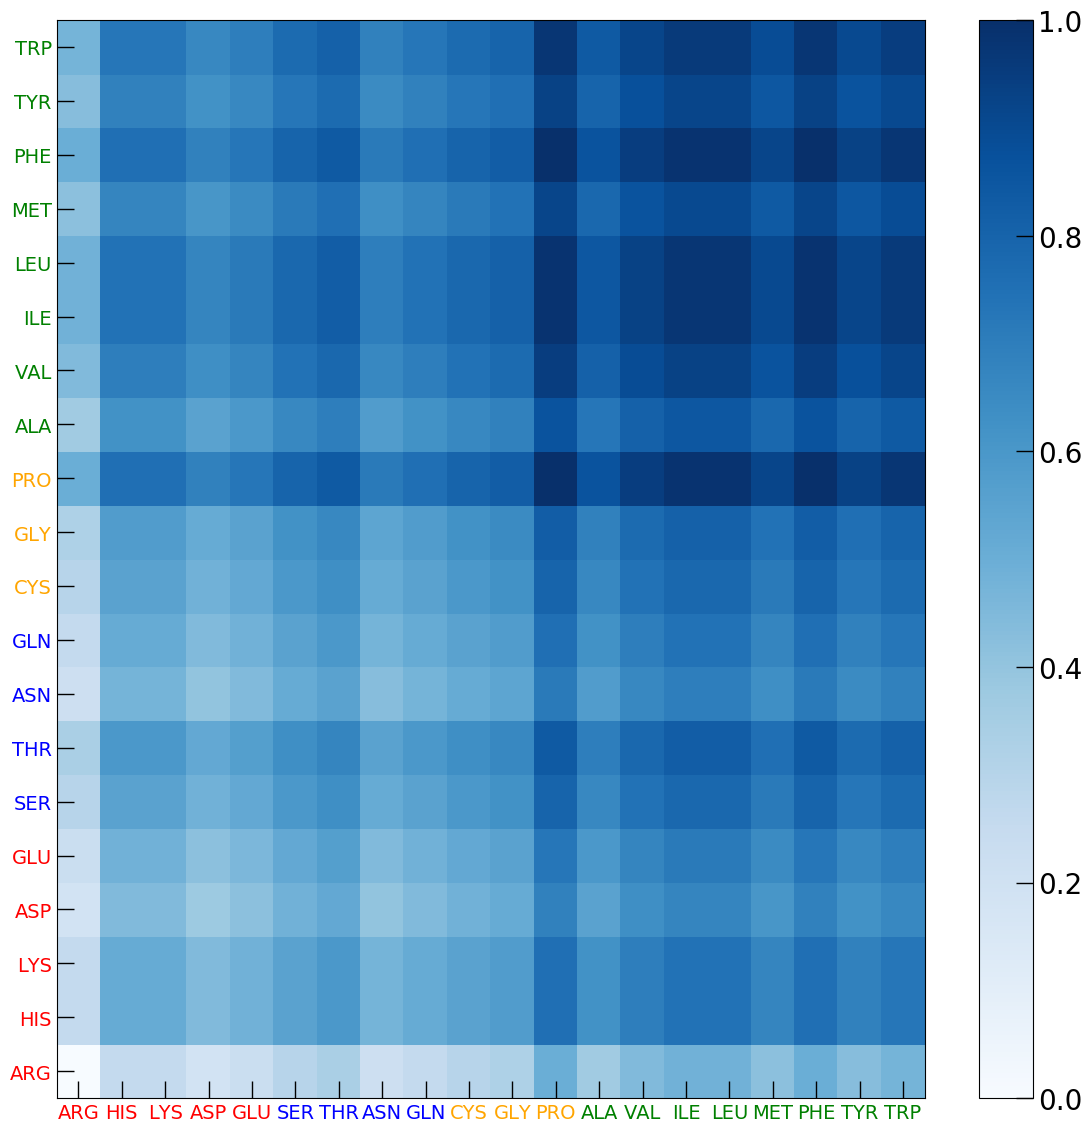

In [296]:
import pandas as pd

plt.figure(figsize=(14,14))
index = aas
columns = aas
color = ["red"]*5 + ["blue"]*4 + ["orange"]*3 + ["green"]*8
# df = pd.DataFrame(abs(np.random.randn(len(aas), len(aas))), index=index, columns=columns)
df = pd.DataFrame(abs(np.random.randn(len(aas), len(aas))), index=index, columns=columns)
for l1 in aas:
    for l2 in aas:
        df[l1][l2] = float((lambdas[l1]+lambdas[l2])/2)

img = plt.pcolor(df, cmap='Blues')
plt.colorbar(img)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)

plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.gca().tick_params(axis='both', which='minor', labelsize=14)

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), color):
    ticklabel.set_color(tickcolor)
    
    
for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), color):
    ticklabel.set_color(tickcolor)
    
plt.show()

### Lambda Potential

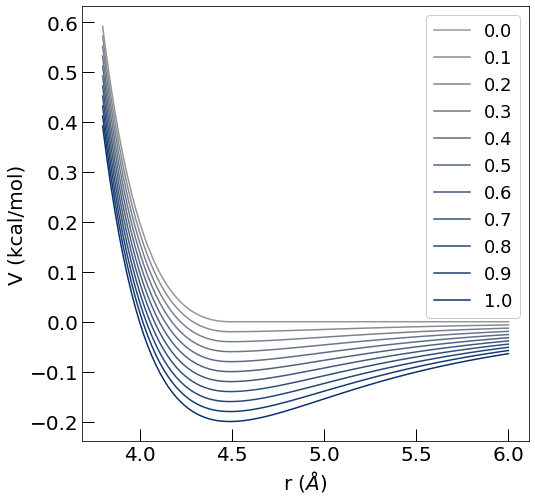

In [6]:
lambdas_r = np.linspace(0,1,11)
def HPS_potential(r, eps, lambd, sigma):
    V = 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)
    close_cond = np.where(r <= 2 ** (1 / 6) * sigma)
    far_cond = np.where(r > 2 ** (1 / 6) * sigma)
    V[close_cond] = V[close_cond] + (1 - lambd) * eps
    V[far_cond] = lambd*V[far_cond]
    return V
r = np.linspace(3.8,6,100)

blue = [8, 49, 109]
white = [150, 150, 150]
a = np.linspace(white[0],blue[0],11, dtype='int')/255
b = np.linspace(white[1],blue[1],11, dtype='int')/255
c = np.linspace(white[2],blue[2],11, dtype='int')/255

eps=0.2
sigma = 4
plt.figure(figsize=(8,8))
for i, l in enumerate(lambdas_r):
    plt.plot(r, HPS_potential(r, eps, l, sigma), label=f'{l:.1f}', color=(a[i], b[i], c[i]))
plt.ylabel("V (kcal/mol)")
plt.xlabel("r ($\AA$)")
plt.legend()

### HPS-T LAMBDAS

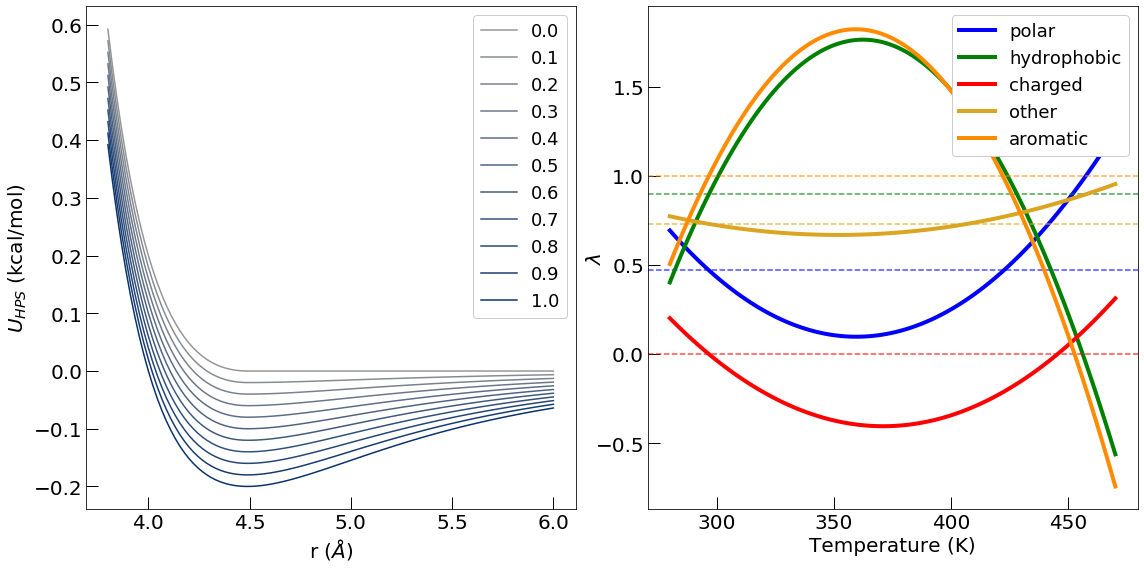

In [19]:
def convert_to_HPST(key, temp):
    l = 0
    if key == "hydrophobic":
        l = l0s[key]["lambda"] - 25.475 + 0.14537*temp - 0.00020059*temp**2
    elif key == "aromatic":
        l = l0s[key]["lambda"] - 26.189 + 0.15034*temp - 0.00020920*temp**2
    elif key == "other":
        l = l0s[key]["lambda"] + 2.4580 - 0.014330*temp + 0.000020374*temp**2
    elif key == "polar":
        l = l0s[key]["lambda"] + 11.795 - 0.067679*temp + 0.000094114*temp**2
    elif key == "charged":
        l = l0s[key]["lambda"] + 9.6614 - 0.054260*temp + 0.000073126*temp**2
    else:
        t = aa["type"]
        raise SystemError(f"We shouldn't be here...{t}")
    return l

l0s = {
    "polar":{"lambda":0.47, "color":'blue'},
    "hydrophobic":{"lambda":0.9, "color":'green'},
    "charged":{"lambda":0, "color":'red'},
    "other":{"lambda":0.73, "color":'goldenrod'},
    "aromatic":{"lambda":1., "color":'darkorange'},
}
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,2, figsize=(16,8))
img = mpimg.imread('/home/adria/eqs.png')


lambdas_r = np.linspace(0,1,11)
def HPS_potential(r, eps, lambd, sigma):
    V = 4 * eps * ((sigma / r) ** 12 - (sigma / r) ** 6)
    close_cond = np.where(r <= 2 ** (1 / 6) * sigma)
    far_cond = np.where(r > 2 ** (1 / 6) * sigma)
    V[close_cond] = V[close_cond] + (1 - lambd) * eps
    V[far_cond] = lambd*V[far_cond]
    return V
r = np.linspace(3.8,6,100)

blue = [8, 49, 109]
white = [150, 150, 150]
a = np.linspace(white[0],blue[0],11, dtype='int')/255
b = np.linspace(white[1],blue[1],11, dtype='int')/255
c = np.linspace(white[2],blue[2],11, dtype='int')/255

eps=0.2
sigma = 4
for i, l in enumerate(lambdas_r):
    axs[0].plot(r, HPS_potential(r, eps, l, sigma), label=f'{l:.1f}', color=(a[i], b[i], c[i]))
axs[0].set_ylabel("$U_{HPS}$ (kcal/mol)")
axs[0].set_xlabel("r ($\AA$)")
axs[0].legend()


Ts = np.linspace(280,470,100)
for key in l0s:
    axs[1].axhline(l0s[key]["lambda"], ls='--', color=l0s[key]["color"], alpha=0.7 )
    axs[1].plot(Ts, convert_to_HPST(key, Ts), label=key, color=l0s[key]["color"], lw=4)
axs[1].legend()
axs[1].xaxis.set_tick_params()
axs[1].yaxis.set_tick_params()
axs[1].set_xlabel("Temperature (K)")
axs[1].set_ylabel("$\lambda$", labelpad=-10)
fig.tight_layout()

### SLABS PLOTS

In [7]:
s = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/SLABS/0.8/D4', equil_frames=0)

> Run Completed at 100.00% for None. Ran 20000 steps for a total of 2 frames 
> Taking frames every 10 for a total of [413, 298, 213, 193, 205] to avoid strong correlations


In [8]:
z, rho_z, xa, caa, pa, shifts = s.density_profile(T=3)

(193, 157)


In [18]:
c_interface, d_interface, z , fit = s.interface_position(z, rho_z.mean(axis=0))

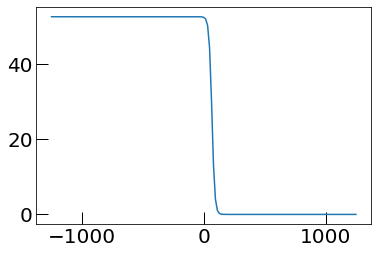

In [19]:
plt.plot(z,fit)

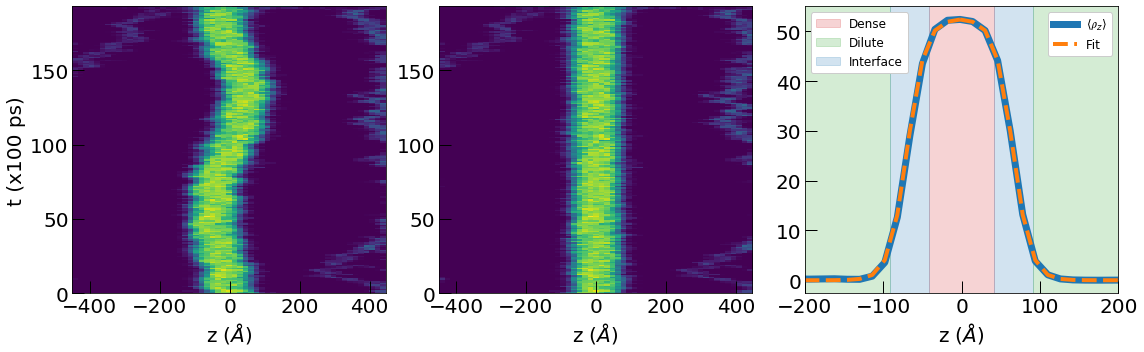

In [105]:
import matplotlib.patches as mpatches

fig, axs = plt.subplots(1,3,figsize=(16,5))
axs[0].imshow(xa[:,50:107], aspect='auto', extent=[z[50:107].min(), z[50:107].max(), 0, xa.shape[0]])
axs[1].imshow(rho_z[:,50:107], aspect='auto', extent=[z[50:107].min(), z[50:107].max(), 0, xa.shape[0]])
axs[0].set_xlabel("z ($\AA$)")
axs[0].set_ylabel("t (x100 ps)")
axs[1].set_xlabel("z ($\AA$)")
axs[2].set_xlabel("z ($\AA$)")
axs[2].plot(z, rho_z.mean(axis=0), lw=7, label='$\langle 𝜌_z⟩ $')
p = axs[2].plot(z[78:], fit[78:], ls='--', lw=4, label='Fit')
axs[2].plot(z[:79], np.flip(fit[78:]), color=p[0].get_color(), ls='--', lw=4)
axs[2].axvspan(*c_interface, color='tab:red', alpha=0.2)
axs[2].axvspan(-200, d_interface[0], color='tab:green', alpha=0.2)
axs[2].axvspan(d_interface[0], c_interface[0], color='tab:blue', alpha=0.2)
axs[2].axvspan(c_interface[1], d_interface[1], color='tab:blue', alpha=0.2)
axs[2].axvspan(d_interface[1], 200,  color='tab:green', alpha=0.2)
axs[2].set_xlim(-200,200)
red_patch = mpatches.Patch(color='tab:red', label='The red data', alpha=0.2)
blue_patch = mpatches.Patch(color='tab:blue', label='The red data', alpha=0.2)
l1 = axs[2].legend([red_patch, green_patch, blue_patch], ["Dense", "Dilute", "Interface"],  loc='upper left', fontsize=12)
axs[2].add_artist(l1)
axs[2].legend(fontsize=12)

fig.tight_layout()

### DIGNON SINGLE TO MULTI

Text(0.5, 0, '$T_{θ} (K)$')

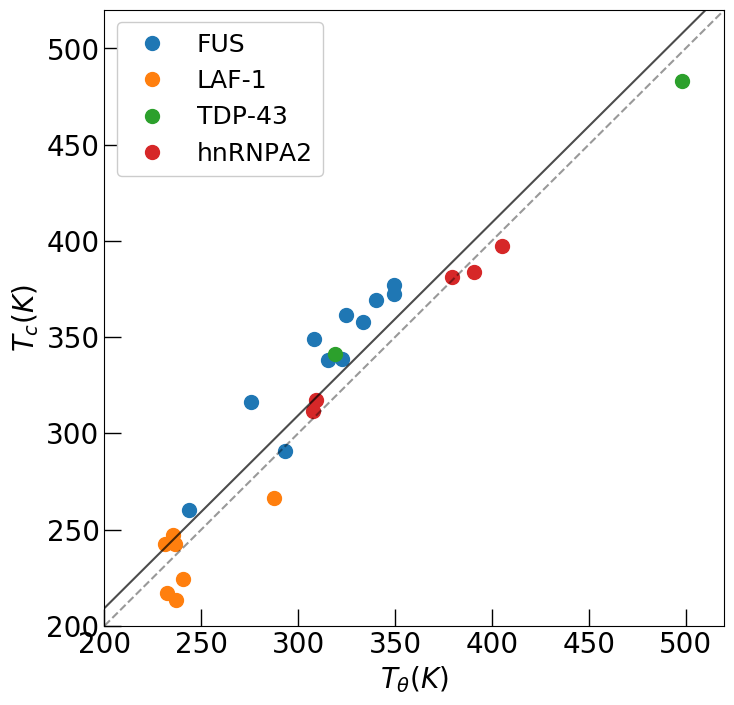

In [102]:
plt.figure(figsize=(8,8))
prots = ['FUS', 'LAF-1', 'TDP', 'hnRNPA2']
# prots = ['hnRNPA2']

tags = ['FUS', 'LAF-1', 'TDP-43', 'hnRNPA2']
# tags = ['hnRNPA2']
thetas = []
tcrits = []
for i in range(len(prots)):
    data = np.genfromtxt(f'/home/adria/documents/{prots[i]}.csv')
#     print(data.shape)
    plt.plot(data[:,0], data[:,1], 'o', label=tags[i])
    thetas += list(data[:,0])
    tcrits += list(data[:,1])
plt.xlim(200,520)
plt.ylim(200,520)
x = np.linspace(200,520,100)
plt.plot(x,x, ls='--', color='black', alpha=0.4)
thetas = np.array(thetas)
tcrits = np.array(tcrits)
slope, y0 = np.polyfit(thetas, tcrits, deg=1)
plt.plot(x, x*slope+y0,color='black',alpha=0.7)
plt.legend(loc='upper left')
plt.ylabel("$T_c (K)$")
plt.xlabel("$T_{θ} (K)$")